# Logistic Regression with TensorFlow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import logging

## Generate data

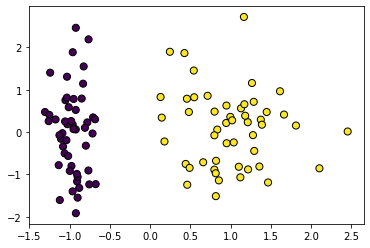

In [2]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=42)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=50, edgecolor='k')

## Layers

In [3]:
input_layer = tf.keras.layers.Input(shape=[2])
output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(input_layer)

## Model

In [4]:
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Training

In [5]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1), metrics=['accuracy'])
history = model.fit(X, y, epochs=100, verbose=False)

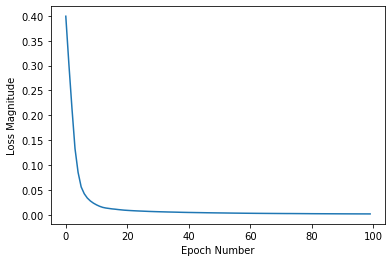

In [6]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [7]:
e = model.evaluate(X, y, verbose=False)
w = model.get_weights()

In [8]:
print(e)
print(w)

[0.0015084578655660153, 1.0]
[array([[4.8909864 ],
       [0.16549326]], dtype=float32), array([0.91569066], dtype=float32)]


In [9]:
pred = model.predict(X)

In [10]:
pred_y = np.reshape(pred, pred.size, order='F') 

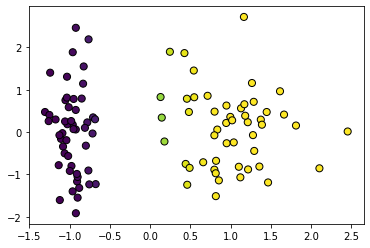

In [11]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=pred_y, s=50, edgecolor='k')